In [40]:
import pandas as pd 
import numpy as np 
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import cross_val_score

In [7]:
train = pd.read_csv('./data/train.csv')
test = pd.read_csv('./data/test.csv')
submission = pd.read_csv('./data/submission.csv')

In [4]:
train

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [5]:
test

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...
413,1305,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
414,1306,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
415,1307,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
416,1308,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S


In [8]:
print(train.shape)
print(test.shape)

(891, 12)
(418, 11)


In [3]:
lr = LinearRegression()

In [9]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [10]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          332 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         417 non-null    float64
 9   Cabin        91 non-null     object 
 10  Embarked     418 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 36.0+ KB


In [11]:
train.corr()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
PassengerId,1.000000,-0.005007,-0.035144,0.036847,-0.057527,-0.001652,0.012658
Survived,-0.005007,1.000000,-0.338481,-0.077221,-0.035322,0.081629,0.257307
Pclass,-0.035144,-0.338481,1.000000,-0.369226,0.083081,0.018443,-0.549500
Age,0.036847,-0.077221,-0.369226,1.000000,-0.308247,-0.189119,0.096067
SibSp,-0.057527,-0.035322,0.083081,-0.308247,1.000000,0.414838,0.159651
Parch,-0.001652,0.081629,0.018443,-0.189119,0.414838,1.000000,0.216225
Fare,0.012658,0.257307,-0.549500,0.096067,0.159651,0.216225,1.000000


In [12]:
train['Sex'] = train['Sex'].replace('male',0)
test['Sex'] = test['Sex'].replace('male',0)

In [13]:
train['Sex'] = train['Sex'].replace('female',1)
test['Sex'] = test['Sex'].replace('female',1)

In [14]:
train.head(3)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",0,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",1,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S


In [15]:
train.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [16]:
train2 = train.dropna(subset=['Embarked'])

In [17]:
print(train2.shape)

(889, 12)


In [18]:
import copy
train2 = train2.copy()
train2.loc[train2['Embarked'] == 'C','Embarked']=0
train2.loc[train2['Embarked'] == 'Q','Embarked']=1
train2.loc[train2['Embarked'] == 'S','Embarked']=2

In [19]:
train2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 889 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  889 non-null    int64  
 1   Survived     889 non-null    int64  
 2   Pclass       889 non-null    int64  
 3   Name         889 non-null    object 
 4   Sex          889 non-null    int64  
 5   Age          712 non-null    float64
 6   SibSp        889 non-null    int64  
 7   Parch        889 non-null    int64  
 8   Ticket       889 non-null    object 
 9   Fare         889 non-null    float64
 10  Cabin        202 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(6), object(4)
memory usage: 90.3+ KB


In [20]:
train2['Embarked'] = train2['Embarked'].astype(int)

In [21]:
# 특정 컬럼과 나머지 컬럼간의 상관계수 계산
train2.corrwith(train2['Embarked'])

PassengerId    0.013166
Survived      -0.169718
Pclass         0.164681
Sex           -0.110320
Age           -0.032565
SibSp          0.068900
Parch          0.040449
Fare          -0.226311
Embarked       1.000000
dtype: float64

In [22]:
train[train['Embarked'].isnull()]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
61,62,1,1,"Icard, Miss. Amelie",1,38.0,0,0,113572,80.0,B28,NaN
829,830,1,1,"Stone, Mrs. George Nelson (Martha Evelyn)",1,62.0,0,0,113572,80.0,B28,NaN


In [23]:
train[train['Fare'] == 80.0]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
61,62,1,1,"Icard, Miss. Amelie",1,38.0,0,0,113572,80.0,B28,NaN
829,830,1,1,"Stone, Mrs. George Nelson (Martha Evelyn)",1,62.0,0,0,113572,80.0,B28,NaN


In [24]:
train[train['Pclass']==1]['Embarked'].value_counts()

S    127
C     85
Q      2
Name: Embarked, dtype: int64

In [25]:
train[train['Survived']==1]['Embarked'].value_counts()

S    217
C     93
Q     30
Name: Embarked, dtype: int64

In [26]:
train['Embarked'].value_counts()

S    644
C    168
Q     77
Name: Embarked, dtype: int64

In [27]:
train['Embarked'] = train['Embarked'].fillna("S")

In [28]:
train.isnull().sum() # 굳

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         0
dtype: int64

In [29]:
train.loc[train.Embarked == 'C','Embarked']=0
train.loc[train.Embarked == 'Q','Embarked']=1
train.loc[train.Embarked == 'S','Embarked']=2

In [30]:
train['Embarked'] = train['Embarked'].astype('int64')

In [31]:
train.corr()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
PassengerId,1.000000,-0.005007,-0.035144,-0.042939,0.036847,-0.057527,-0.001652,0.012658,0.013128
Survived,-0.005007,1.000000,-0.338481,0.543351,-0.077221,-0.035322,0.081629,0.257307,-0.167675
Pclass,-0.035144,-0.338481,1.000000,-0.131900,-0.369226,0.083081,0.018443,-0.549500,0.162098
Sex,-0.042939,0.543351,-0.131900,1.000000,-0.093254,0.114631,0.245489,0.182333,-0.108262
Age,0.036847,-0.077221,-0.369226,-0.093254,1.000000,-0.308247,-0.189119,0.096067,-0.030394
SibSp,-0.057527,-0.035322,0.083081,0.114631,-0.308247,1.000000,0.414838,0.159651,0.068230
Parch,-0.001652,0.081629,0.018443,0.245489,-0.189119,0.414838,1.000000,0.216225,0.039798
Fare,0.012658,0.257307,-0.549500,0.182333,0.096067,0.159651,0.216225,1.000000,-0.224719
Embarked,0.013128,-0.167675,0.162098,-0.108262,-0.030394,0.068230,0.039798,-0.224719,1.000000


In [32]:
test.isnull().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

In [33]:
test[test['Fare'].isnull()]

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
152,1044,3,"Storey, Mr. Thomas",0,60.5,0,0,3701,NaN,NaN,S


In [34]:
fare = pd.DataFrame(test[test['Pclass']==3]['Fare'].value_counts().nlargest(12))
fare = fare.reset_index()
fare

,index,Fare
0,7.7500,21
1,8.0500,17
2,7.8958,11
3,7.7750,10
4,7.2292,9
5,7.2250,9
6,8.6625,8
7,7.8542,8
8,7.8792,6
9,7.2500,5


In [35]:
# 오잉 index의 평균이어서 그렇습니다.
fare['index'].mean()

8.395141666666667

In [36]:
test['Fare'] = test['Fare'].fillna("7.753825")

In [37]:
test.isnull().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          327
Embarked         0
dtype: int64

177

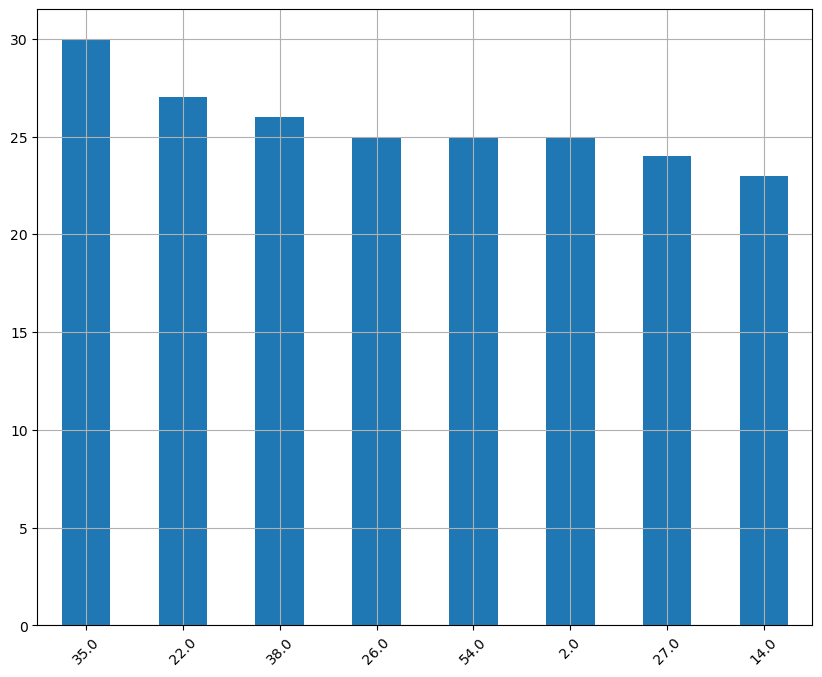

In [38]:
def normalize(x):
  return (x-x.min())/(x.max()-x.min())

def standardscaler(x):
  return (x-x.mean())/x.std()
#정규화와 표준화 같은 경우 패키지로도 잘 나와있기 때문에 위처럼 정의를 해도 되고, 패키지를 써도 됩니다. 따라서 패키지를 이용하여 바꾸어주겠습니다.

from sklearn.preprocessing import StandardScaler

ss = StandardScaler()
ss.fit(train[['Fare']])
train_fare = ss.transform(train[['Fare']])
test_fare = ss.transform(test[['Fare']])

train['Fare2'] = train_fare
test['Fare2'] = test_fare

train.head(3)

#이렇게 하여 완성된 열 중에서 필요한 열만 독립 변수로 가져옵니다.

data = train[['Pclass','Sex','SibSp','Parch','Embarked','Fare2','Survived']]
#여기서부터 이제 모델링을 하시면 됩니다.
#독립 변수 : 'Pclass','Sex','SibSp','Parch','Embarked','Fare2'
#종속 변수 : 'Survived'

#이 후 모델링 비교를 하시면 됩니다 :)

#번외) Age를 독립변수를 쓰지 않은 이유
#=> 편차가 너무 크고 null값이 너무 많았습니다.


train['Age'].value_counts(ascending=True)


#나이를 구간별로 바꾸려고 min과 max를 확인해보니 0살도 있고 80살도 있습니다.
#아래는 나이 값들을 시각화해본 모습입니다.

CountStatus = pd.value_counts(train['Age'].values, sort=True)
CountStatus.plot.bar()
CountStatus.plot.bar(grid=True, figsize=(10,8), fontsize=15)  # figsize, fontsize 조정
#<matplotlib.axes._subplots.AxesSubplot at 0x7f571abfc250>


train['Age'].values[:10]


import matplotlib.pyplot as plt
CountStatus = pd.value_counts(train['Age'].values[:10], sort=True)
CountStatus.plot.bar()
CountStatus.plot.bar(grid=True, figsize=(10,8), fontsize=10)
plt.xticks(rotation=45)



train['Age'].isnull().sum()

In [39]:
train_x = train[['Pclass', 'SibSp','Age', 'Sex']]
train_y = train['Survived']

test_x = test[['Pclass', 'SibSp', 'Age', 'Sex']]

In [41]:
# 모델 만들기
model = DecisionTreeClassifier()
# 학습하기
model.fit(train_x, train_y)

ValueError: Input contains NaN, infinity or a value too large for dtype('float32').

In [42]:
test_y_pred = model.predict(test_x)

ValueError: Input contains NaN, infinity or a value too large for dtype('float32').

In [ ]:
submission = pd.read_csv("titanic/sample_submission.csv")
submission['Survived'] = test_y_pred
submission.to_csv('베이스 라인 .csv', index = False)